Osnabrück University - Computer Vision (Winter Term 2022/23) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 02: Image Enhancement

## Introduction

This week's sheet should be solved and handed in before end of **Sunday, November 20, 2022**. If you need help (and Google and other resources were not enough), use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Contrast enhancement (5 points)

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

to do
The Contrast describes the differ between the dark and the light pixel-values of an image.
One Way to measure it is with global contrast, which is the difference between the darkest pixel of an image and the lightest, normalized to a range from 0 to 1.
Another way to measure contrast is with a local contrast, which is the average value difference of neighboring pixels.

Low contrast can be caused by overexposure of an image, this is an issue when the lightening of the alrady light areas leads to them reaching the maximum value. If they would exceed that threshold, the information is instead just lost.

A way to improve contrast is to make use of histogram equalization.

### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

We need to make image look better, when the pixel of the image have dense gray value. When image have high entropy which means the image has the histogram of the image is flat, the image has maximum information content. We can use histogram to understand how the image looks like and make the gray value equal. First, we need to understand the image. We will calculate how many pixels each gray value has. After this calculation, get the accumulated number of the pixels so that we can know which gray value has many pixels. And redistribute pixels for gray value which have many pixels. With histogram equalization, we can make images have increased entropy.

### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-04 slides 22/23).

histogram became not as uniform as before, due to present of zero values which caused gaps in the histogram

## Assignment 2: Computing Contrast and Entropy (5 points)


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

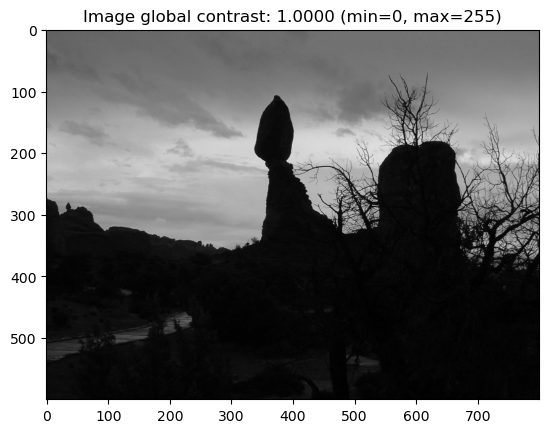

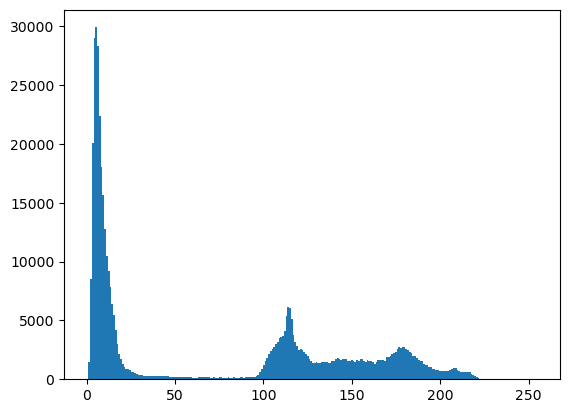

In [1]:
%matplotlib inline
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        contrast (float): The global contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)

    
    contrast = abs(img.max() - img.min())/value_range[1]  #the contrast is the absolute value of the difference between the lightest and darkest value normalised to the range of values.

    return contrast

img = imread('images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

C:\Users\lucyh\AppData\Local\Temp\ipykernel_7376\3890738506.py:32: RuntimeWarning: overflow encountered in ubyte_scalars
  contrast = contrast + abs( img[x,y] - (1/3)*(img[x,y-1] + img[x+1,y] + img[x,y+1]))
C:\Users\lucyh\AppData\Local\Temp\ipykernel_7376\3890738506.py:47: RuntimeWarning: overflow encountered in ubyte_scalars
  contrast = contrast + abs( img[x,y] - (1/3)*(img[x-1,y] + img[x+1,y] + img[x,y+1]))
C:\Users\lucyh\AppData\Local\Temp\ipykernel_7376\3890738506.py:24: RuntimeWarning: overflow encountered in ubyte_scalars
  contrast = contrast + abs( img[x,y] - 0.25*(img[x-1,y] + img[x,y-1] + img[x,y+1] + img[x+1,y]))


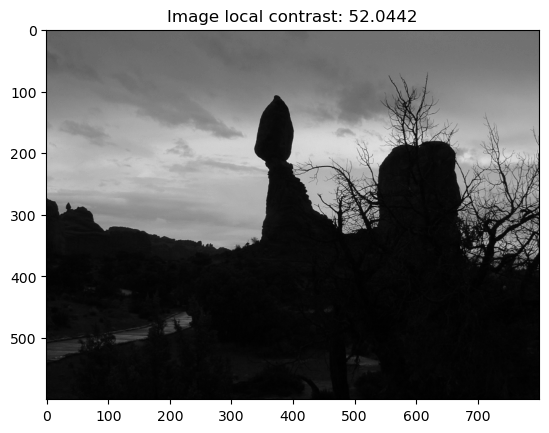

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio.v2 import imread

def local_contrast(img):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """
    contrast = 0
    x_range = img.shape[0]-1
    y_range = img.shape[1]-1
    

# the local contrast is the sum of average differences of neigbouring (4-neighbourhood) pixels...     
    for x in range(x_range) :
        for y in range(y_range) : 
            if( (0 < x < x_range-1) and (0 < y < y_range-1)) : # if the pixel is not at the edge of the image
                contrast = contrast + abs( img[x,y] - 0.25*(img[x-1,y] + img[x,y-1] + img[x,y+1] + img[x+1,y]))
                
            #There are special cases if the current pixel lies in a corner or at the edge of the image, as that influences the 4-Neighborhood of the pixel.
            
            elif(x == 0 and y == 0) : #if the pixel is at the top left corner of the image
                contrast = contrast + abs( img[x,y] - 0.5*(img[x+1,y] + img[x,y+1]))
                
            elif(x == 0 and (0 < y < y_range-1)) : # if the pixel is at the top edge of the image
                contrast = contrast + abs( img[x,y] - (1/3)*(img[x,y-1] + img[x+1,y] + img[x,y+1]))
            
            elif(x == 0 and y == y_range) : # if the pixel is at the top right corner of the image
                contrast = contrast + abs( img[x,y] - 0.5*(img[x+1,y] + img[x,y-1]))
                
            elif(x == x_range and y == 0): # if the pixel is at the bottom left corner of the image
                contrast = contrast + abs( img[x,y] - 0.5*(img[x-1,y] + img[x,y+1]))
            
            elif(x == x_range and (0 < y < y_range-1)) :  # if the pixel is at the bottom edge of the image
                contrast = contrast + abs( img[x,y] - (1/3)*(img[x,y-1] + img[x-1,y] + img[x,y+1]))
            
            elif(x == x_range and y == y_range) : #if the pixel is at the bottom right corner of the image
                contrast = contrast + abs( img[x,y] - 0.5*(img[x-1,y] + img[x,y-1]))
                
            elif((0 < x < x_range-1) and y == 0) : # if the pixel is at the left edge of the image
                contrast = contrast + abs( img[x,y] - (1/3)*(img[x-1,y] + img[x+1,y] + img[x,y+1]))
                
            elif((0 < x < x_range-1) and y == y_range) : #if the pixel is at the right edge of the image
                contrast = contrast + abs( img[x,y] - (1/3)*(img[x,y-1] + img[x-1,y] + img[x+1,y]))
            
    contrast = contrast/img.size # ... divided by the total number of pixels
                
            
    return contrast   


img = imread('images/dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

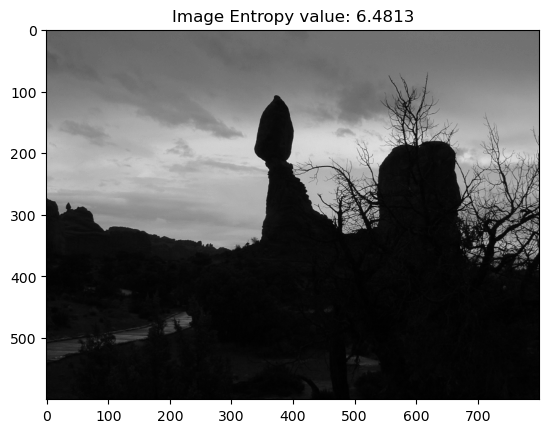

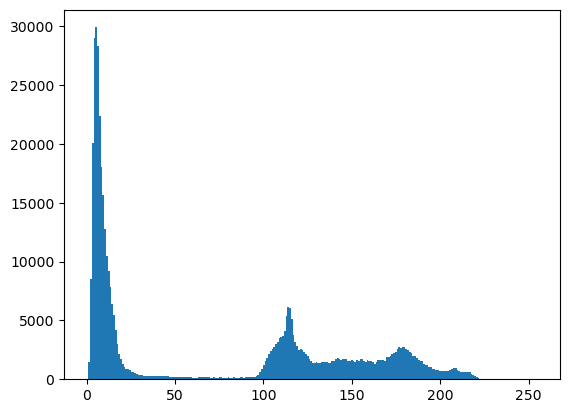

AssertionError: 

In [12]:
%matplotlib inline
import numpy as np
import math
from imageio.v2 import imread
import scipy.stats

def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        img_entropy (float): The entropy of the image. 
    """
    
    img_entropy = 0
    value_prob = np.zeros(256)
    shape = img.shape
    # count the frequency of the different values
    for x in range(shape[0]-1):
        for y in range(shape[1]-1):
            value_prob[img[x,y]] += 1 
    
    value_prob = value_prob/img.size  # the probability of a value is the frequency with witch it occurrs divided by the total number of pixels
    
    for i in range(len(value_prob)):
        if(value_prob[i] != 0 ):
            img_entropy += value_prob[i] * math.log2(value_prob[i])
    
    img_entropy = img_entropy * -1
    return img_entropy

img = imread('images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

assert math.isclose(entropy(img), scipy.stats.entropy(np.unique(img.flat, return_counts=True)[1], base=2))

### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

C:\Users\lucyh\AppData\Local\Temp\ipykernel_7376\3890738506.py:24: RuntimeWarning: overflow encountered in ubyte_scalars
  contrast = contrast + abs( img[x,y] - 0.25*(img[x-1,y] + img[x,y-1] + img[x,y+1] + img[x+1,y]))
C:\Users\lucyh\AppData\Local\Temp\ipykernel_7376\3890738506.py:47: RuntimeWarning: overflow encountered in ubyte_scalars
  contrast = contrast + abs( img[x,y] - (1/3)*(img[x-1,y] + img[x+1,y] + img[x,y+1]))


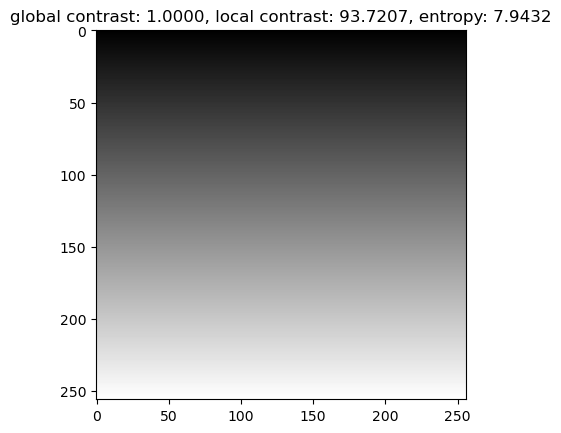

C:\Users\lucyh\AppData\Local\Temp\ipykernel_7376\3890738506.py:32: RuntimeWarning: overflow encountered in ubyte_scalars
  contrast = contrast + abs( img[x,y] - (1/3)*(img[x,y-1] + img[x+1,y] + img[x,y+1]))


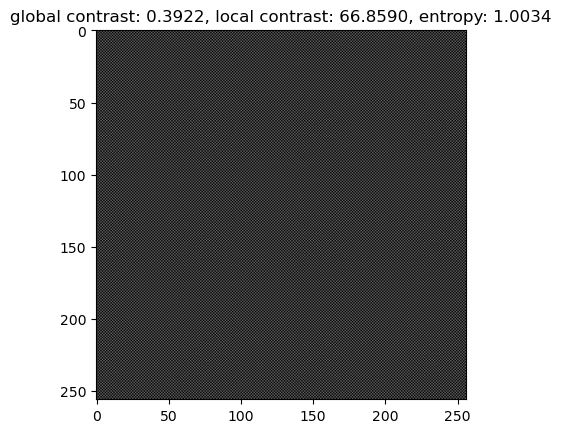

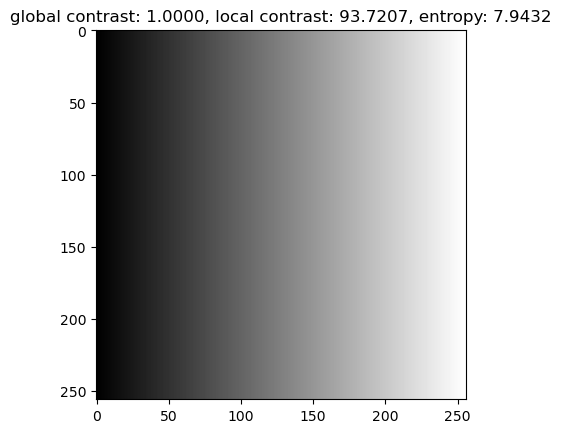

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_info(img):
    """ Displays an image, local and global contrast, and the entropy
    
    Args:
        img (ndarray): Image which is displayed and statics are computed for.
        
    """
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()


img1 = np.zeros((256, 256),np.uint8)

for x in range(256):
    img1[x:]=x
image_info(img1)


img2 = np.zeros((256, 256),np.uint8)
for x in range(256) :
    for y in range(256) :
        if( x%2 == 0) :
            if( y%2 == 0) :
                img2[x,y] = 100
        else:
            if( y%2 != 0) :
                img2[x,y] = 100
image_info(img2)


img3 = np.zeros((256, 256),np.uint8)

for x in range(256):
    for y in range(256):
        img3[x,y] = y

image_info(img3)

## Assignment 3: Adaptive Histogram Equalization (5 points)

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994]. You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

the image is divided into contextual regions, the suitable number of contextual region depend on the size of the image 8*8, 64*64, 512*512, the aim is to calculated the suitable contrast to input image.
disadvantage: improving the contrast of the whole image including the background noise

### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

it's main idea is to reduce the contrast of the peak in the local histogram. it is used to overcome the disadvantage of AHE and it is easy to use. simply it works on reducing the wasted pixels in the background noise by cutting these pixels and then equally redistributed these pixels over the whole histogram to keep the total count of the histogram the same.

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

the gray level appear in the form of white dots in the contextual region. suppose that we have 4 point on the contextual region (E,F,G,H), intensity at each point is I, x and y are the distance with respect to point E.
I' = (1-y)(1-x)gE(I)+ xgF(I)+y((1-x)gG(I)+xgH(I))
- because interpolation is used to determine the unknown values even if they aren't equally spaced

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-04, slide 31).

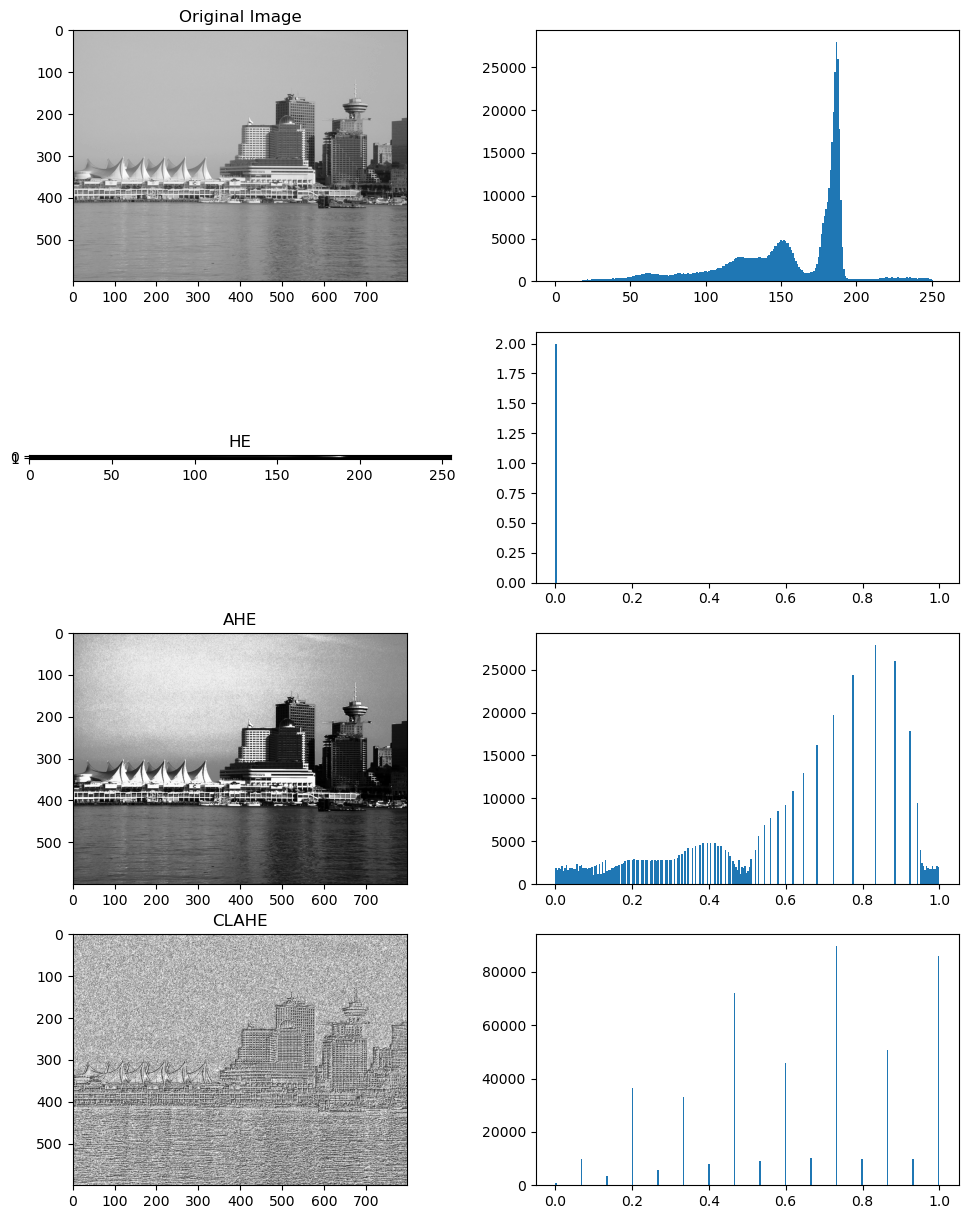

In [6]:
%matplotlib inline
# YOUR CODE HERE
def abstract_method(self):
    raise NotImplementedError
    
import imageio.v2 as imageio
from imageio import imread
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float
import numpy as np
from scipy.stats import entropy

img =imageio.imread("images/canada.png", pilmode='L')
image = img_as_float(img)


img_he = exposure.histogram(img, nbins = 2)
img_ahe = exposure.equalize_hist(img, nbins = 256)
img_clahe = exposure.equalize_adapthist(img, [2,2])


def abstract_method(self):
    raise NotImplementedError()

plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(4,2,2)
#plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he)
plt.subplot(4,2,4)
#plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img.flatten(), 256, (0, 1))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe)
plt.subplot(4,2,6)
#plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 1))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe)
plt.subplot(4,2,8)
#plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 1))

plt.show()

## Assignment 4: Colormaps (5 points)

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

Sequential : change in lightness and often saturation of color incrementally, often using a single hue; should be used for representing information that has ordering.

Diverging: change in lightness and possibly saturation of two different colors that meet in the middle at an unsaturated color; should be used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero.

Qualitative: often are miscellaneous colors; should be used to represent information which does not have ordering or relationships.

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-04, slide 35):

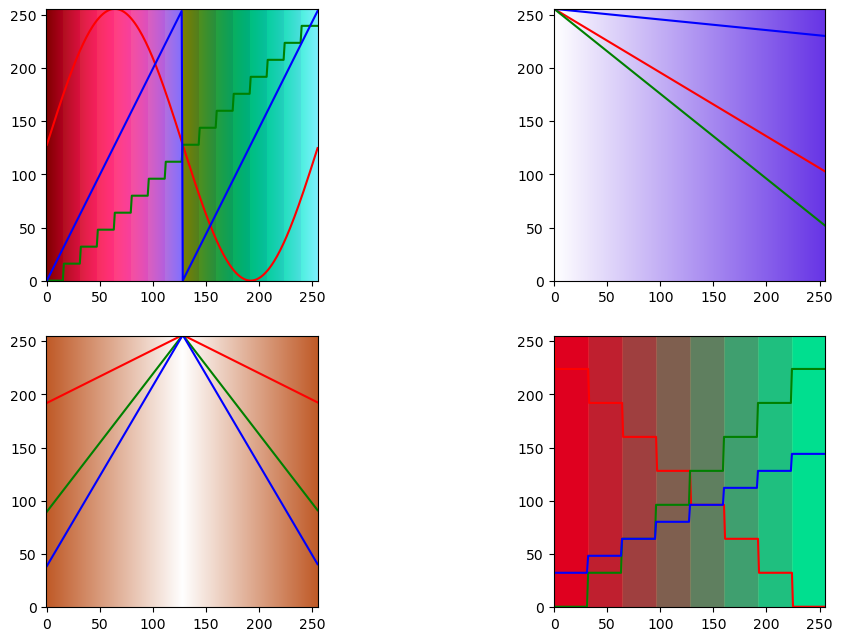

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

color = []


# The following is just for demonstration: replace and extend by your own examples
color.append(np.asarray((lambda x: np.sin(x/256*2*np.pi)*128+128, 
              lambda x: (x//16) * 16,
              lambda x: (2*x) % 256)))

# Sequential
color.append(np.asarray((lambda x : 256 - 0.6 * x,
                         lambda x : 256 - 0.8 * x,
                         lambda x : 256 - 0.1 * x)))

# Diverging
color.append(np.asarray((lambda x : 256 - np.abs(64 - 0.5 * x),
                         lambda x : 256 - np.abs(166.4 - 1.3 * x),
                         lambda x : 256 - np.abs(217.6 - 1.7 * x))))


# Qualitative
color.append(np.asarray((lambda x: (((256-x)//32) * 32), 
              lambda x: (x//32) * 32,
              lambda x: (x//32) * 16 + 32)))


gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i in range(len(color)):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[i][0](gray), 'red')
    plt.plot(gray, color[i][1](gray), 'green')
    plt.plot(gray, color[i][2](gray), 'blue')
    plt.imshow(np.stack([color[i][0](a),color[i][1](a),color[i][2](a)],axis=2)/256, origin='lower')
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} =  g ^ \gamma + a \begin{pmatrix}0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix} \begin{pmatrix}\cos \theta \\ \sin \theta\end{pmatrix}$$
with $\theta = 2 \pi (\frac{\text{start_color }}{3} + \text{rotations}\cdot g)$ and $ a = \frac{\gamma\cdot\text{hue}\cdot g\cdot( 1 - \gamma g)}{2}$ (with 'start_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

C:\Users\lucyh\AppData\Local\Temp\ipykernel_7376\1835701351.py:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('images/lung.png', pilmode='L')


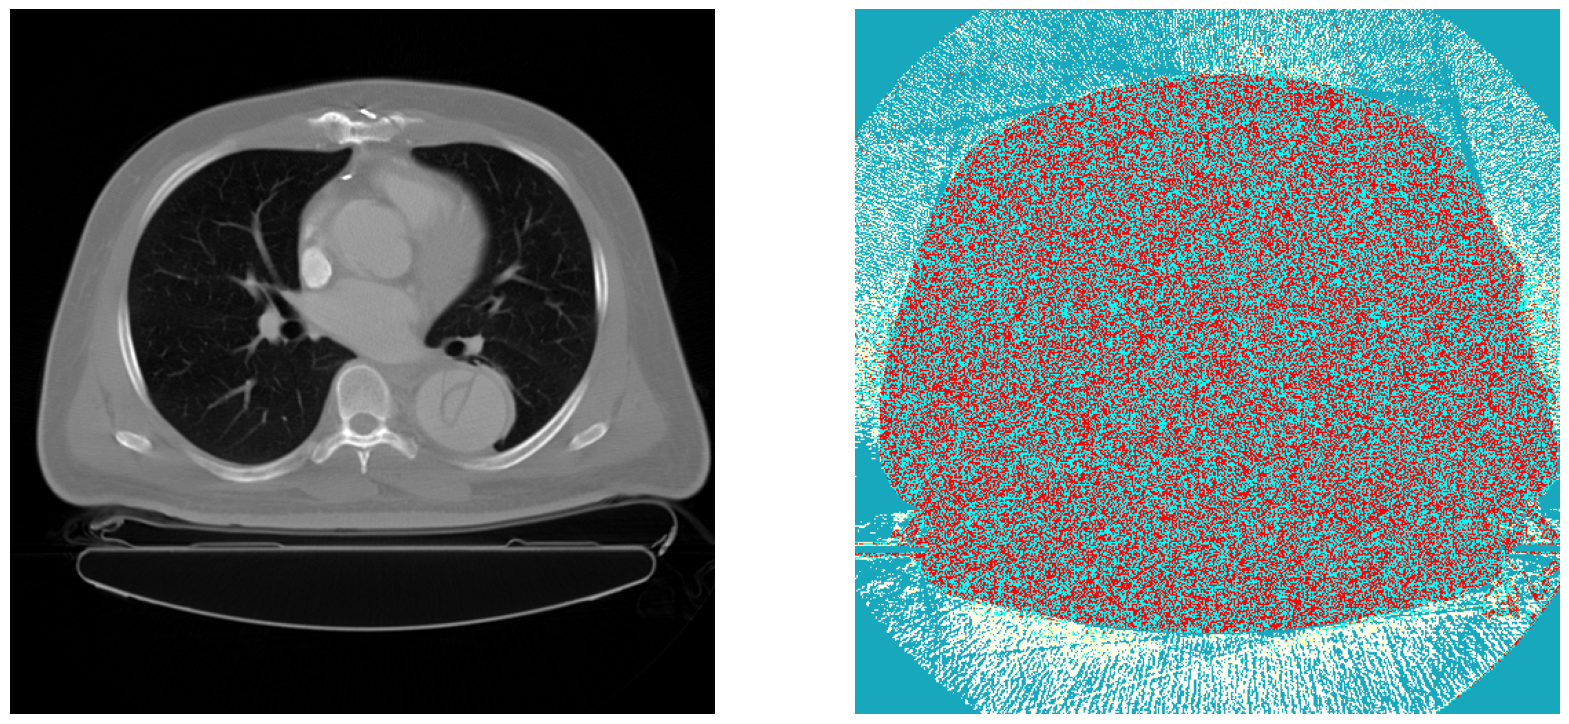

In [17]:
%matplotlib inline
from math import pi
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

start_color = 1
rotations = 3
hue = 2
gamma = 1
m = np.mat([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: 
        lookup_table (ndarray): The cube helix color map. (256,3)
    """
    lookup_table = np.empty((256,3), float)
    
    for i in np.arange(256):
        # YOUR CODE HERE
        fract = (i-1)/2.0
        theta = 2*pi*(start_color/3.0+1.0+rotations*fract)
        fract = fract ** gamma
        amp = hue * fract * (1-fract) /2.0
#         amp = (gamma*hue*((i-1)/2.0)*(1-gamma*((i-1)/2.0)))/2.0
                      
        lookup_table[i][0] = fract + amp * (-0.14861*np.cos(theta)+1.78277*np.sin(theta))
        lookup_table[i][1] = fract + amp * (-0.29227*np.cos(theta)-0.90649*np.sin(theta))
        lookup_table[i][2] = fract + amp * (1.97294*np.cos(theta))

    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Args:
        img (ndarray): The image (ndim=2).
        lookup_table (ndarray): The lookup table (shape=(256,3)).
        
    Return:
        color_img (ndarray): The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

In [ ]:
# This code was taken from 
# https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

def grayify_cmap(cmap):
    """Return a grayscale version of the colormap
    
    Args:
        cmap (ndarray): RGB Colormap.
    
    Returns:
        (ndarray): Gray Colormap.
    
    """
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

def show_colormap(cmap):
    """Plots RGB colormap and grayified colormap
    
    Args: 
        cmap (ndarray): Colormap.
    
    """
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 1.5),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    
# printing the jet colormap and how it would look like if printed black and white
show_colormap('jet')

# doing the same for cube helix
show_colormap('cubehelix')


YOUR ANSWER HERE